In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [2]:
df_airlines = pd.read_csv("datasets/airlines_delay.csv")

In [3]:
df_airlines

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1


In [4]:
#df_X = df_airlines.drop("Class", axis = 1)

In [5]:
#df_Y = df_airlines["Class"]

In [6]:
#
# Pré-processamento
#

In [7]:
airlines_fetuares_cat = ["Airline", "AirportFrom", "AirportTo", "DayOfWeek"]
airlines_fetuares_num = ["Flight", "Time", "Length", ]
airlines_target = ["Class"]

In [8]:
df_airlines_cat = pd.DataFrame()

le_airlines_airline = preprocessing.LabelEncoder()
le_airlines_portFrom = preprocessing.LabelEncoder()
le_airlines_portTo = preprocessing.LabelEncoder()

le_airlines_airline.fit(df_airlines["Airline"])
le_airlines_portFrom.fit(df_airlines["AirportFrom"])
le_airlines_portTo.fit(df_airlines["AirportTo"])

df_airlines_cat["Airline"] = le_airlines_airline.transform(df_airlines["Airline"])
df_airlines_cat["AirportFrom"] = le_airlines_portFrom.transform(df_airlines["AirportFrom"])
df_airlines_cat["AirportTo"] = le_airlines_portTo.transform(df_airlines["AirportTo"])

df_airlines_cat["DayOfWeek"] = df_airlines["DayOfWeek"]

df_airlines_num = df_airlines[airlines_fetuares_num]
df_airlines_target = df_airlines["Class"]

In [9]:
# Gráficos

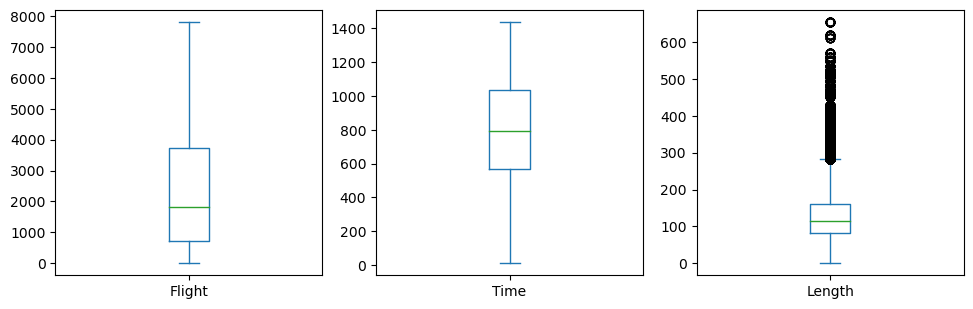

In [10]:
df_airlines_num.plot(kind='box',subplots = True,layout = (5,5),figsize = (20,20))
plt.show()

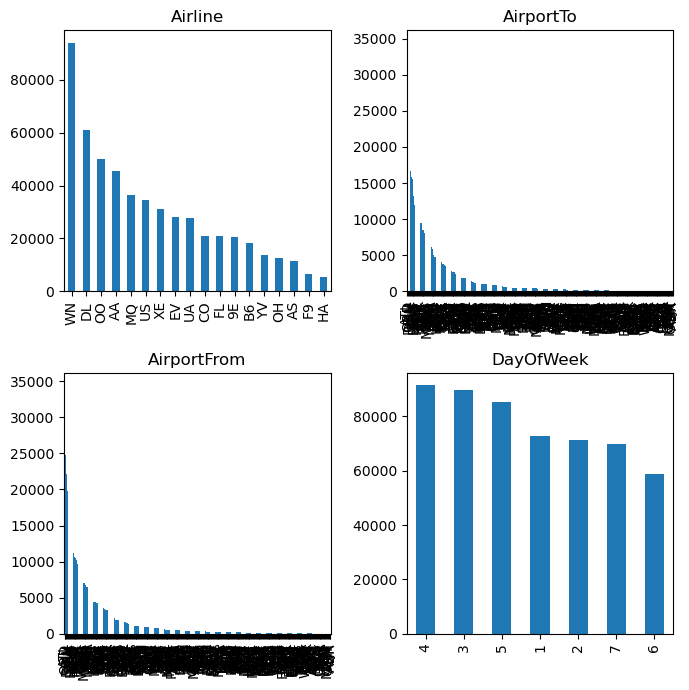

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

df_airlines["Airline"].value_counts().plot(kind="bar", ax=axes[0, 0], title="Airline")

df_airlines["AirportFrom"].value_counts().plot(kind="bar", ax=axes[1, 0], title="AirportFrom")

df_airlines["AirportTo"].value_counts().plot(kind="bar", ax=axes[0, 1], title="AirportTo")

df_airlines["DayOfWeek"].value_counts().plot(kind="bar", ax=axes[1, 1], title="DayOfWeek")

#df_airlines[f].value_counts().plot(kind="bar", ax=axes[i], title=f)

#df_airlines[f].value_counts().plot(kind="bar", ax=axes[i], title=f)

#df_airlines[f].value_counts().plot(kind="bar", ax=axes[i], title=f)


#axes[0].set_ylabel("Count")
#axes[1].set_xticklabels([])
#axes[1].set_xlabel("Airports From")
#axes[2].set_xticklabels([])
#axes[2].set_xlabel("Airports To")

plt.tight_layout()
plt.show()

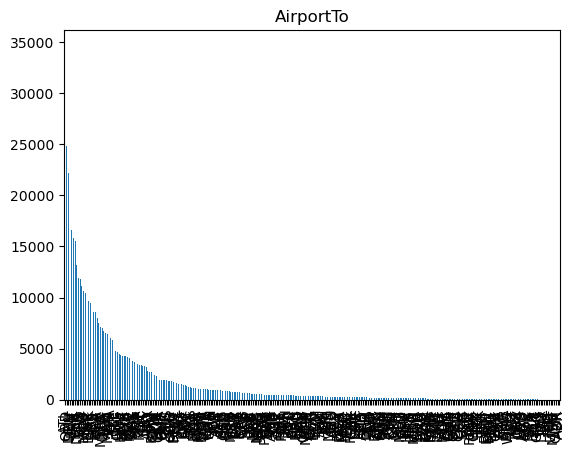

In [12]:
df_airlines["AirportTo"].value_counts().plot(kind="bar", title="AirportTo")
plt.show()

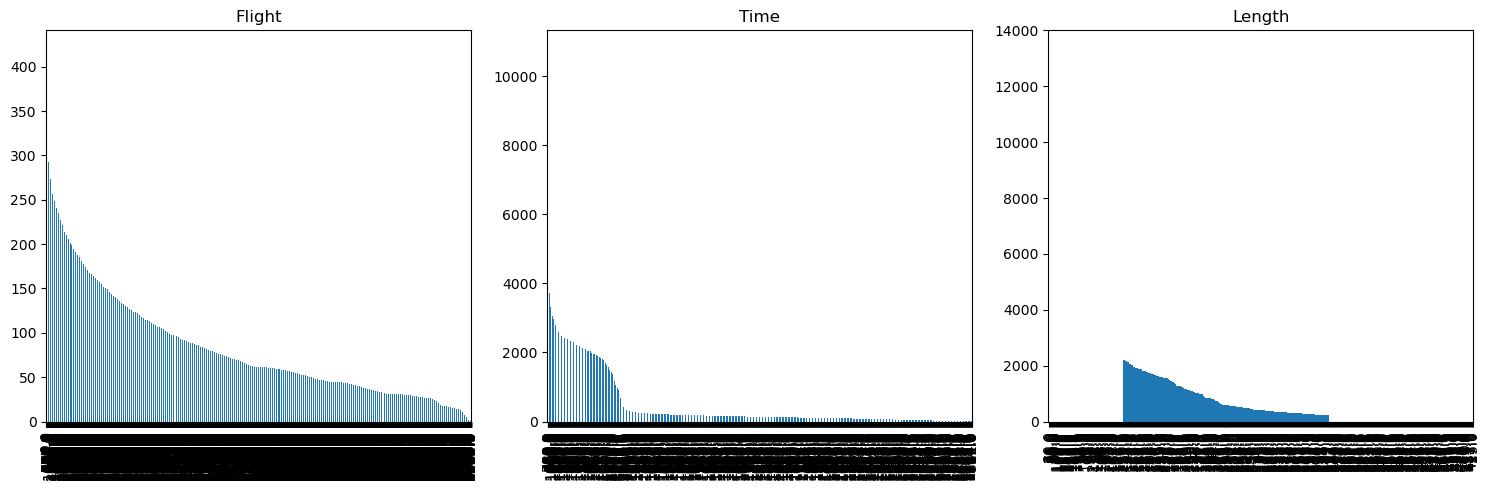

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, f in enumerate(airlines_fetuares_num):
    df_airlines[f].value_counts().plot(kind="bar", ax=axes[i], title=f)
    

plt.tight_layout()
plt.show()

[Text(0, 0, 'Pontual'), Text(1, 0, 'Atrasado')]

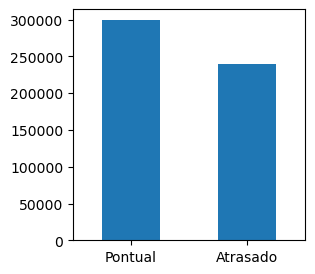

In [14]:
fig, ax = plt.subplots(figsize=(3, 3))

df_airlines_target.value_counts().plot(kind="bar")

ax.set_xticklabels(["Pontual", "Atrasado"], rotation = 0)

In [15]:
df_airlines_features = pd.concat([df_airlines_cat, df_airlines_num], axis = 1)

In [16]:
df_airlines_features

,Airline,AirportFrom,AirportTo,DayOfWeek,Flight,Time,Length
0,5,16,129,1,2313.0,1296.0,141.0
1,12,65,208,4,6948.0,360.0,146.0
2,3,35,60,3,1247.0,1170.0,143.0
3,14,203,217,6,31.0,1410.0,344.0
4,8,32,16,4,563.0,692.0,98.0
...,...,...,...,...,...,...,...
539377,12,111,252,5,6973.0,530.0,72.0
539378,15,153,79,4,1264.0,560.0,115.0
539379,6,47,16,2,5209.0,827.0,74.0
539380,15,45,43,4,607.0,715.0,65.0


In [17]:
ordem_colunas = ["Flight", "Time", "Length", "Airline", "AirportFrom", "AirportTo", "DayOfWeek"]
df_airlines_features = df_airlines_features[ordem_colunas]

In [18]:
df_airlines_features

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek
0,2313.0,1296.0,141.0,5,16,129,1
1,6948.0,360.0,146.0,12,65,208,4
2,1247.0,1170.0,143.0,3,35,60,3
3,31.0,1410.0,344.0,14,203,217,6
4,563.0,692.0,98.0,8,32,16,4
...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,12,111,252,5
539378,1264.0,560.0,115.0,15,153,79,4
539379,5209.0,827.0,74.0,6,47,16,2
539380,607.0,715.0,65.0,15,45,43,4


In [19]:
#
# Modelo KNN
#

In [20]:
quantidade_folds = 5
kf = KFold(n_splits = quantidade_folds, shuffle = True, random_state = 42)

In [21]:
knn_neighbors = [2, 5, 7, 10]
knn_weights = ["uniform", "distance"]
knn_algorithm = ["ball_tree", "kd_tree", "brute"]
knn_leaf_size = [10, 30, 50, 70]
knn_p = [1, 2, 5, 10]
knn_metric = ["cityblock", "cosine", "euclidean", "haversine", "l1", "l2", "manhattan", "nan_euclidean"]

In [23]:
knn_neighbors = [2]#, 5, 10]
knn_weights = ["uniform"]#, "distance"]
knn_algorithm = ["ball_tree"]#, "kd_tree", "brute"]
knn_leaf_size = [30]
knn_p = [2]
knn_metric = ["cityblock"]#, "euclidean", "l2", "manhattan"]

In [24]:
nome_colunas = ["n_neightbors", "weights", "algorithm", "leaf_size", "p", "metric", "Accuracy"]
df_parametros = pd.DataFrame(columns=nome_colunas)
for i_neightbors in (knn_neighbors):
    for i_weights in (knn_weights):
        for i_algorithm in (knn_algorithm):
            for i_leaf in (knn_leaf_size):
                for i_p in (knn_p):
                    for i_metric in (knn_metric):
                        model = KNeighborsClassifier(n_neighbors=i_neightbors, 
                                                      weights=i_weights, 
                                                      algorithm=i_algorithm, 
                                                      leaf_size= i_leaf,
                                                      p=i_p, 
                                                      metric=i_metric)
                        accuracy_scores = []
                        for i, (train_index, test_index) in enumerate(kf.split(df_airlines_features)):
                            x_train, x_test = df_airlines_features.iloc[train_index], df_airlines_features.iloc[test_index]
                            y_train, y_test = df_airlines_target.iloc[train_index], df_airlines_target.iloc[test_index]

                            model.fit(x_train, y_train)

                            y_pred = model.predict(x_test)

                            accuracy = accuracy_score(y_test, y_pred)

                            accuracy_scores.append(accuracy)
                        # Calcular a média e o desvio padrão das métricas de desempenho
                        
                        mean_accuracy = np.mean(accuracy_scores)
                        std_accuracy = np.std(accuracy_scores)
                        
                        nova_linha = pd.DataFrame({"n_neightbors": [i_neightbors], "weights": [i_weights], 
                                                   "algorithm": [i_algorithm], "leaf_size": [i_leaf], 
                                                   "p": [i_p], "metric":[i_metric], "Accuracy":[mean_accuracy]})
                        df_parametros = pd.concat([df_parametros, nova_linha], axis=0)
                        
                        

                        # Exibir os resultados
                        print("n_neighbors: ", i_neightbors, "weights: ", i_weights, "algorithm: ", i_algorithm, "leaf_size: ", i_leaf, "p: ", i_p, "metric: ", i_metric)
                        print("\nAccuracy: %.2f%% (+/- %.2f%%)" % (mean_accuracy * 100, std_accuracy * 100))
    

n_neighbors:  2 weights:  uniform algorithm:  ball_tree leaf_size:  30 p:  2 metric:  cityblock

Accuracy: 62.13% (+/- 0.12%)


In [25]:
#df_para = df_parametros
df_para = pd.read_csv("continuar_parametros.csv")

In [26]:
df_parametros

,n_neightbors,weights,algorithm,leaf_size,p,metric,Accuracy
0,2,uniform,ball_tree,30,2,cityblock,0.621307


In [27]:
df_para = df_para.reset_index()

In [28]:
df_para

,index,n_neightbors,weights,algorithm,leaf_size,p,metric,Accuracy
0,0,2,uniform,ball_tree,30,2,cityblock,0.621307
1,1,2,uniform,ball_tree,30,2,euclidean,0.621356
2,2,2,uniform,ball_tree,30,2,l2,0.621356
3,3,2,uniform,ball_tree,30,2,manhattan,0.621307
4,4,2,uniform,kd_tree,30,2,cityblock,0.621387
...,...,...,...,...,...,...,...,...
67,67,10,distance,kd_tree,30,2,manhattan,0.616103
68,68,10,distance,brute,30,2,cityblock,0.616125
69,69,10,distance,brute,30,2,euclidean,0.615896
70,70,10,distance,brute,30,2,l2,0.615896


In [29]:
model = KNeighborsClassifier()

In [30]:
kf = KFold(n_splits = quantidade_folds, shuffle = True, random_state = 42)

In [31]:
accuracy_scores = []

In [32]:
for i, (train_index, test_index) in enumerate(kf.split(df_airlines_features)):
    x_train, x_test = df_airlines_features.iloc[train_index], df_airlines_features.iloc[test_index]
    y_train, y_test = df_airlines_target.iloc[train_index], df_airlines_target.iloc[test_index]
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)
                           
                           
    
    

In [33]:
# Calcular a média e o desvio padrão das métricas de desempenho
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Exibir os resultados
print("Accuracy: %.2f%% (+/- %.2f%%)" % (mean_accuracy * 100, std_accuracy * 100))

Accuracy: 64.27% (+/- 0.09%)


In [34]:
df_para[df_para["Accuracy"]>0.64]

,index,n_neightbors,weights,algorithm,leaf_size,p,metric,Accuracy
24,24,5,uniform,ball_tree,30,2,cityblock,0.643092
25,25,5,uniform,ball_tree,30,2,euclidean,0.642847
26,26,5,uniform,ball_tree,30,2,l2,0.642847
27,27,5,uniform,ball_tree,30,2,manhattan,0.643092
28,28,5,uniform,kd_tree,30,2,cityblock,0.643151
29,29,5,uniform,kd_tree,30,2,euclidean,0.642658
30,30,5,uniform,kd_tree,30,2,l2,0.642658
31,31,5,uniform,kd_tree,30,2,manhattan,0.643151
32,32,5,uniform,brute,30,2,cityblock,0.643607
33,33,5,uniform,brute,30,2,euclidean,0.643270


In [35]:
accuracy = model.score(x_test, y_test)

In [36]:
accuracy

0.6429418962512514

In [37]:
k_values = range(1, 10)
scores = []

In [38]:
rf = RandomForestClassifier()

In [39]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
nome_colunas = ["n_neightbors", "weights", "algorithm", "leaf_size", "p", "metric", "Accuracy"]
teste = pd.DataFrame(columns=nome_colunas)

In [41]:
teste

,n_neightbors,weights,algorithm,leaf_size,p,metric,Accuracy


In [42]:
nova_linha = pd.DataFrame({"n_neightbors": [i_neightbors], "weights": [i_weights], "algorithm": [i_algorithm], 
                           "leaf_size": [i_leaf], "p": [i_p], "metric":[i_metric], "Accuracy":[mean_accuracy]})

In [43]:
nova_linha = pd.DataFrame({'Nome': ['Carlos'], 'Idade': [40]})

In [44]:
nova_linha

,Nome,Idade
0,Carlos,40


In [45]:
teste = pd.concat([teste, nova_linha], axis=0)

In [46]:
teste

,n_neightbors,weights,algorithm,leaf_size,p,metric,Accuracy,Nome,Idade
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carlos,40.0


In [47]:
#
# Avaliação 
#

In [48]:
# Matrix de confusão
##
##   [Verdadeiro Positivo (TP)                Falso Positivo(FP)      ]
##   [Falso Negativo (FN)                     Verdadeiro Negativo (TN)]

In [49]:
model_opt = KNeighborsClassifier(n_neighbors=10, weights="uniform", algorithm="ball_tree", leaf_size=30, 
                                 p=2, metric="manhattan" )
kf = KFold(n_splits = quantidade_folds, shuffle = True, random_state = 42)
accuracy_scores = []

for i, (train_index, test_index) in enumerate(kf.split(df_airlines_features)):
    x_train, x_test = df_airlines_features.iloc[train_index], df_airlines_features.iloc[test_index]
    y_train, y_test = df_airlines_target.iloc[train_index], df_airlines_target.iloc[test_index]
    
    model_opt.fit(x_train, y_train)
    
    y_pred = model_opt.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)
    
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Exibir os resultados
print("Accuracy: %.2f%% (+/- %.2f%%)" % (mean_accuracy * 100, std_accuracy * 100))

Accuracy: 65.36% (+/- 0.09%)


In [50]:
#10	uniform	ball_tree	30	2	cityblock
model_opt2 = KNeighborsClassifier(n_neighbors=10, weights="uniform", algorithm="ball_tree", leaf_size=30, 
                                 p=2, metric="cityblock" )
kf = KFold(n_splits = quantidade_folds, shuffle = True, random_state = 42)
accuracy_scores = []
confusion_matrices = []

for i, (train_index, test_index) in enumerate(kf.split(df_airlines_features)):
    x_train, x_test = df_airlines_features.iloc[train_index], df_airlines_features.iloc[test_index]
    y_train, y_test = df_airlines_target.iloc[train_index], df_airlines_target.iloc[test_index]
    
    model_opt2.fit(x_train, y_train)
    
    y_pred = model_opt2.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)
    
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    print("Fold Confusion Matrix:")
    print(cm)
    print()
    
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Exibir os resultados
print("Accuracy: %.2f%% (+/- %.2f%%)" % (mean_accuracy * 100, std_accuracy * 100))

Fold Confusion Matrix:
[[47509 12205]
 [25332 22831]]

Fold Confusion Matrix:
[[47773 12026]
 [25333 22745]]

Fold Confusion Matrix:
[[47797 12186]
 [25191 22702]]

Fold Confusion Matrix:
[[47899 11978]
 [25285 22714]]

Fold Confusion Matrix:
[[47724 12021]
 [25287 22844]]

Accuracy: 65.36% (+/- 0.09%)


In [51]:
confusion_matrices[1]

array([[47773, 12026],
       [25333, 22745]])

In [52]:
len(confusion_matrices)

5

In [53]:
TP = 0
NP = 0
NF = 0
TN = 0
for i in range(0,5):
    TP += confusion_matrices[i][0,0]
    NP += confusion_matrices[i][0,1]
    NF += confusion_matrices[i][1,0]
    TN += confusion_matrices[i][1,1]
    
TP = TP/5
NP = NP/5
NF = NF/5
TN = TN/5

In [54]:
#Taxa de Verdadeiros (TVP)
# TVP = (VP)/(VP+FN)
TVP = TP/(TP+NP)
TVP

0.798019510694776

In [55]:
#Taxa de Falsos positivos (TFP)
# TFP = (FP)/(FP+VN)
TFP = NF/(NF+TN)
TFP

0.5262045083741217

In [56]:
# Acurácia (ACC) 
# ACC = (VP + VN) / (VP + FP + VN + FN)
ACC = (TP + TN)/(TP+NP+NF+TN)
ACC

0.6535961526339403

In [57]:
# Erro (E)
# E = 1 - ACC
E = 1 - ACC
E

0.34640384736605967

In [58]:
#precisão (Pr)
# Pr = (VP)/(FP+VP)
Pr = TP/(NF+TP)
Pr

0.6537452414208639

In [59]:
# revocação (Re)
# Re = VP/(FN+VP)
Re = TP/(NP+TP)
Re

0.798019510694776

In [60]:
# F1 Score
# F1 = 2*(Pr*Re)/(Pr+Re)
F1 = 2*(Pr*Re)/(Pr+Re)
F1

0.7187134925509749

In [61]:
# Curva ROC

In [62]:
df_para[df_para["Accuracy"] == df_para["Accuracy"].max()]

,index,n_neightbors,weights,algorithm,leaf_size,p,metric,Accuracy
48,48,10,uniform,ball_tree,30,2,cityblock,0.653596
51,51,10,uniform,ball_tree,30,2,manhattan,0.653596


In [63]:
df_para[df_para["Accuracy"] == df_para["Accuracy"].min()]

,index,n_neightbors,weights,algorithm,leaf_size,p,metric,Accuracy
21,21,2,distance,brute,30,2,euclidean,0.612097
22,22,2,distance,brute,30,2,l2,0.612097


In [64]:
model_opt2

KNeighborsClassifier(algorithm='ball_tree', metric='cityblock', n_neighbors=10)

In [65]:
df_parametros.to_csv('continuar_parametros.csv', index=False)

In [66]:
df_parametros

,n_neightbors,weights,algorithm,leaf_size,p,metric,Accuracy
0,2,uniform,ball_tree,30,2,cityblock,0.621307
